In [28]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
df1 = pd.read_csv('BestCard_data.csv')

In [30]:
df1.dataframeName = 'BestCard_data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 26664 rows and 31 columns


In [31]:
defaulters = df1.copy()
print(defaulters.shape)
defaulters.head()

(26664, 31)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


In [32]:
defaulters.describe().T


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,26664.0,167919.054905,129839.453081,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,26664.0,1.603060,0.489272,1.0,1.00,2.0,2.00,2.0
EDUCATION,26664.0,1.842334,0.744661,1.0,1.00,2.0,2.00,4.0
MARRIAGE,26664.0,1.556031,0.521463,1.0,1.00,2.0,2.00,3.0
AGE,26664.0,35.505213,9.227442,21.0,28.00,34.0,41.00,79.0
PAY_1,26664.0,-0.017777,1.126769,-2.0,-1.00,0.0,0.00,8.0
PAY_2,26664.0,-0.133363,1.198640,-2.0,-1.00,0.0,0.00,8.0
PAY_3,26664.0,-0.167679,1.199165,-2.0,-1.00,0.0,0.00,8.0
PAY_4,26664.0,-0.225023,1.167897,-2.0,-1.00,0.0,0.00,8.0
PAY_5,26664.0,-0.269764,1.131735,-2.0,-1.00,0.0,0.00,8.0


In [33]:
defaulters.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [38]:
defaulters.rename(columns={'default payment next month':'def_pay'}, inplace=True)
defaulters.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [39]:
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               26664 non-null  object
 1   LIMIT_BAL        26664 non-null  int64 
 2   SEX              26664 non-null  int64 
 3   EDUCATION        26664 non-null  int64 
 4   MARRIAGE         26664 non-null  int64 
 5   AGE              26664 non-null  int64 
 6   PAY_1            26664 non-null  int64 
 7   PAY_2            26664 non-null  int64 
 8   PAY_3            26664 non-null  int64 
 9   PAY_4            26664 non-null  int64 
 10  PAY_5            26664 non-null  int64 
 11  PAY_6            26664 non-null  int64 
 12  BILL_AMT1        26664 non-null  int64 
 13  BILL_AMT2        26664 non-null  int64 
 14  BILL_AMT3        26664 non-null  int64 
 15  BILL_AMT4        26664 non-null  int64 
 16  BILL_AMT5        26664 non-null  int64 
 17  BILL_AMT6        26664 non-null

In [40]:
defaulters.isna().sum()    # check for missing values for surity


ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_1              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
def_pay            0
EDUCATION_CAT      0
graduate school    0
high school        0
none               0
others             0
university         0
dtype: int64

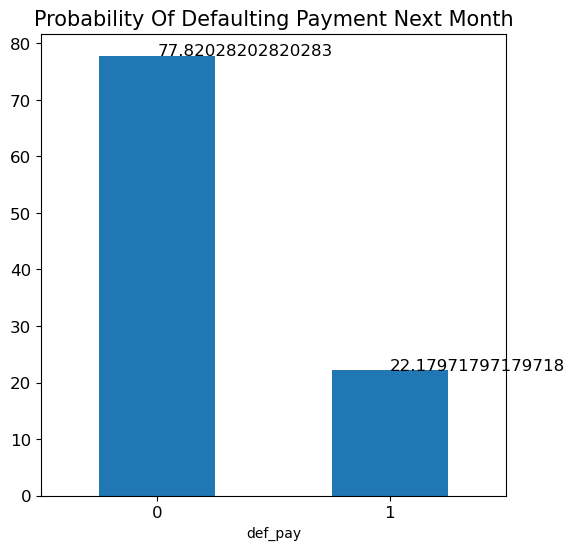

The percentage of defaulters in the data is 22.17971797179718 %


[]

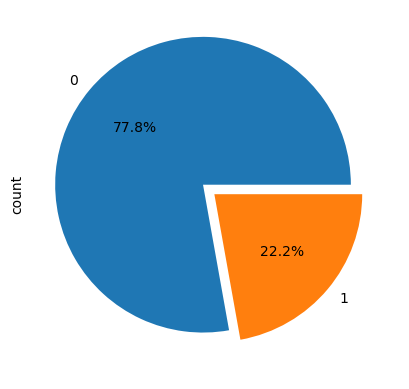

In [52]:
def_cnt = (defaulters.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

# How many defaulters
perc_default = defaulters.def_pay.sum() / len(defaulters.def_pay)
print(f'The percentage of defaulters in the data is {perc_default*100} %')
defaulters['def_pay'].value_counts().plot(kind='pie',explode=[0.1,0],autopct="%1.1f%%")
plt.plot()

SEX
     Value  Count  Percentage
SEX                          
1        1  10584   39.693969
2        2  16080   60.306031
--------------------------


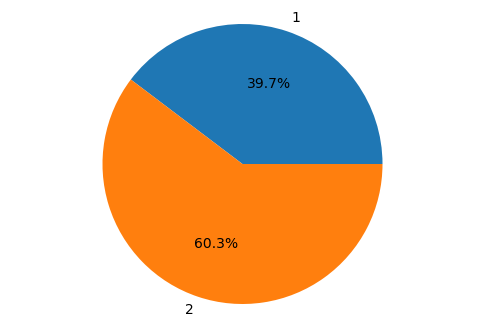

MARRIAGE
          Value  Count  Percentage
MARRIAGE                          
1             1  12172   45.649565
2             2  14158   53.097810
3             3    334    1.252625
--------------------------


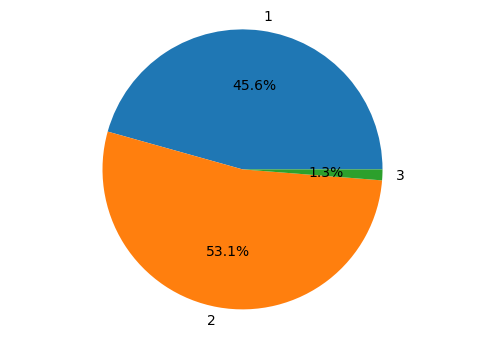

EDUCATION
           Value  Count  Percentage
EDUCATION                          
1              1   9412   35.298530
2              2  12458   46.722172
3              3   4380   16.426643
4              4    414    1.552655
--------------------------


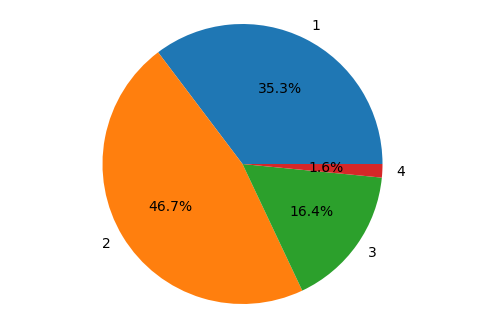

In [54]:
def show_value_counts(col):
    print(col)
    value_counts = defaulters[col].value_counts()
    percentage = value_counts / len(defaulters) * 100
    result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts, 'Percentage': percentage})
    result_df = result_df.sort_values(by='Value')
    print(result_df)
    print('--------------------------')
    generate_pie_plot(result_df)
    
    
def generate_pie_plot(data_frame):
    plt.figure(figsize=(6, 4))
    plt.pie(data_frame['Count'], labels=data_frame['Value'], autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()
    

show_value_counts('SEX')
show_value_counts('MARRIAGE')
show_value_counts('EDUCATION')

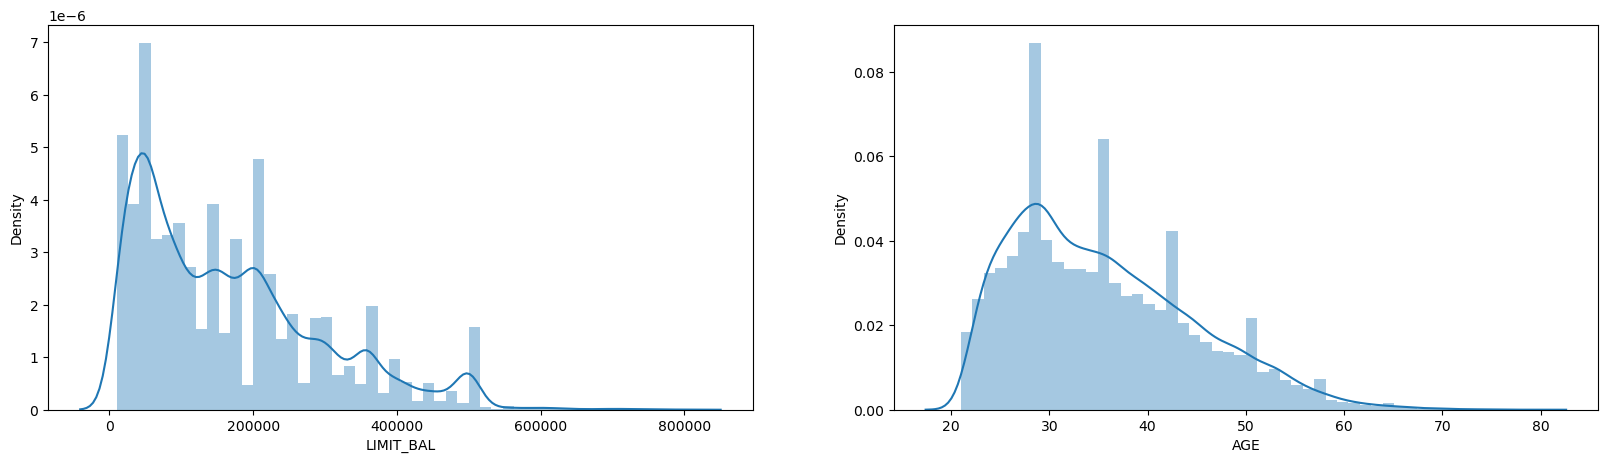

In [42]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(defaulters.LIMIT_BAL)

plt.subplot(122)
sns.distplot(defaulters.AGE)

plt.show()

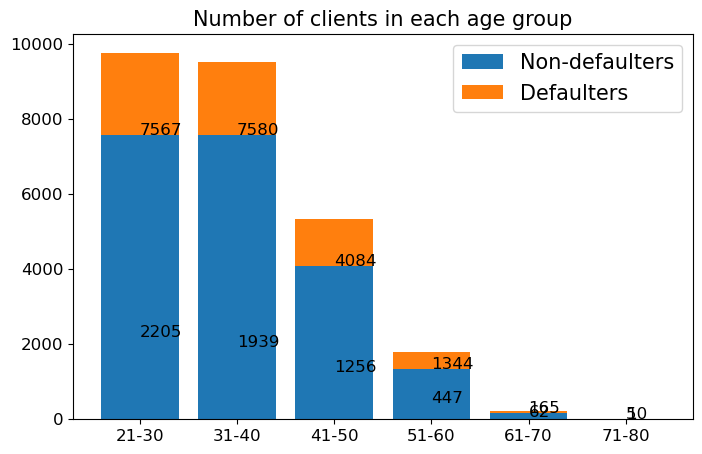

In [59]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
defaulters['AGE_BIN'] = pd.cut(x=defaulters.AGE, bins=bins, labels=names, right=True)

age_cnt = defaulters.AGE_BIN.value_counts()
age_0 = (defaulters.AGE_BIN[defaulters['def_pay'] == 0].value_counts().reindex(names))
age_1 = (defaulters.AGE_BIN[defaulters['def_pay'] == 1].value_counts().reindex(names))

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='Non-defaulters')
plt.bar(age_1.index, age_1.values, label='Defaulters', bottom=age_0.values)
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

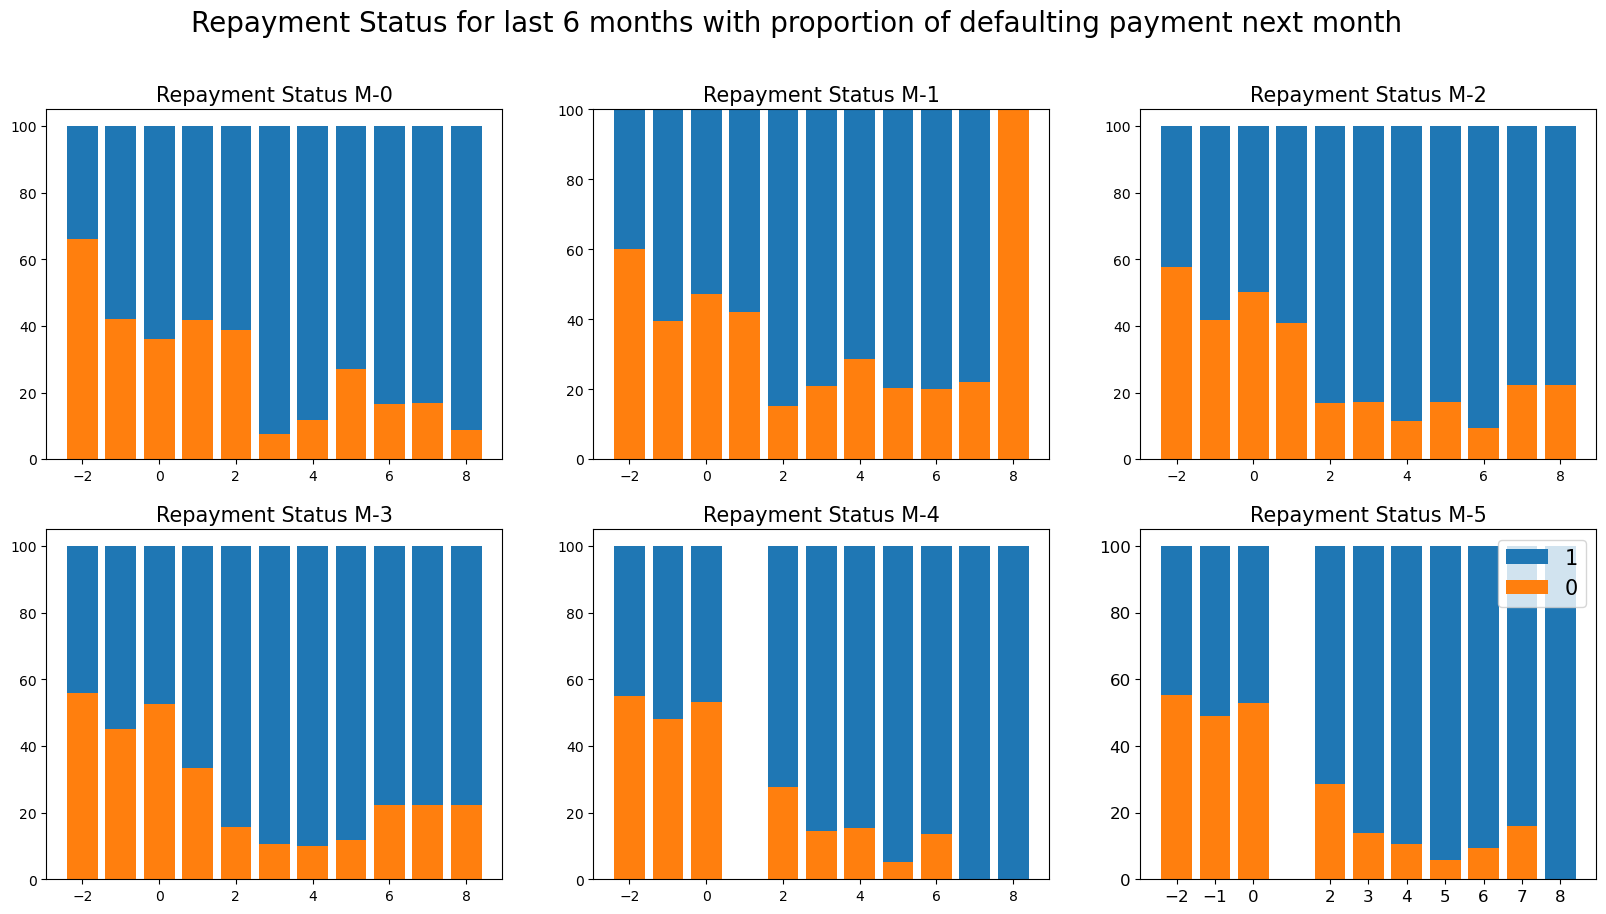

In [44]:
plt.subplots(figsize=(20,10))

ind = sorted(defaulters.PAY_1.unique())
pay_0 = (defaulters.PAY_1[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_1[defaulters['def_pay'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(defaulters.PAY_2.unique())
pay_0 = (defaulters.PAY_2[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_2[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(defaulters.PAY_3.unique())
pay_0 = (defaulters.PAY_3[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_3[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(defaulters.PAY_4.unique())
pay_0 = (defaulters.PAY_4[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_4[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(defaulters.PAY_5.unique())
pay_0 = (defaulters.PAY_5[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_5[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(defaulters.PAY_6.unique())
pay_0 = (defaulters.PAY_6[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_6[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()

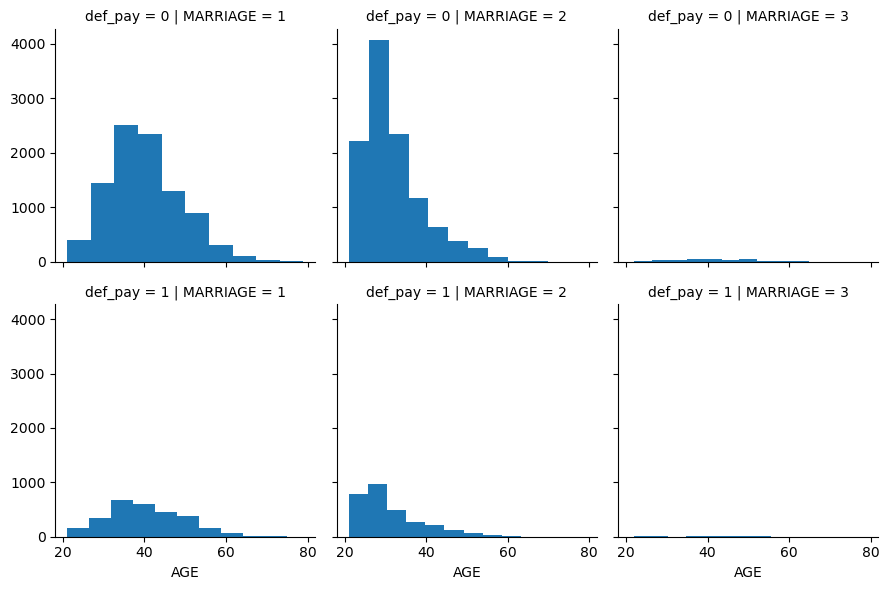

In [45]:
g = sns.FacetGrid(defaulters, row='def_pay', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

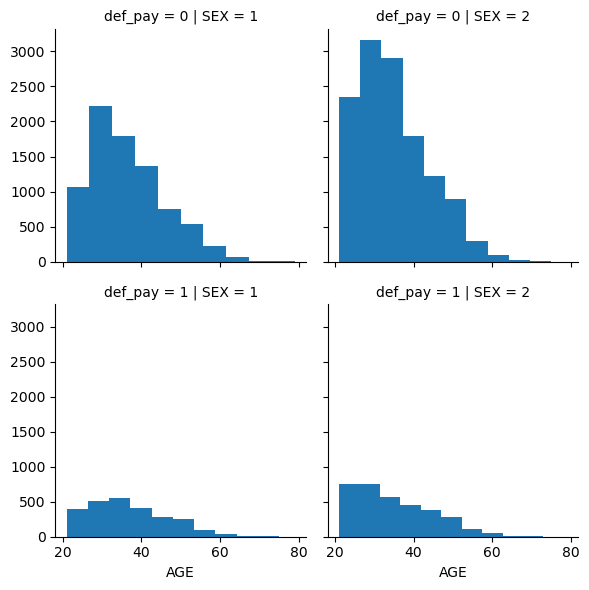

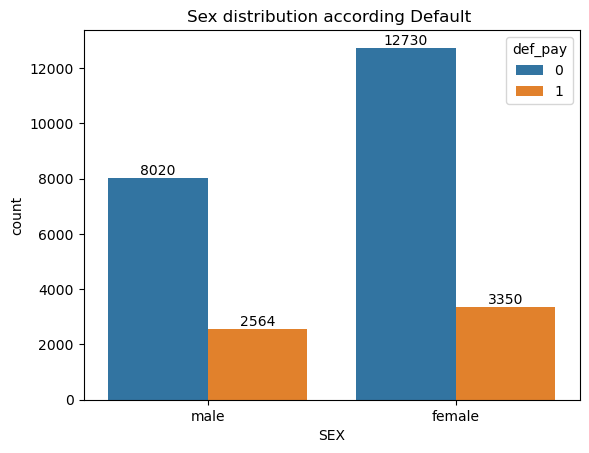

In [57]:
g = sns.FacetGrid(defaulters, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')
plt.show()

ax=sns.countplot(data=defaulters, x="SEX", hue="def_pay")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["male", "female"])
plt.title("Sex distribution according Default ")
plt.show()

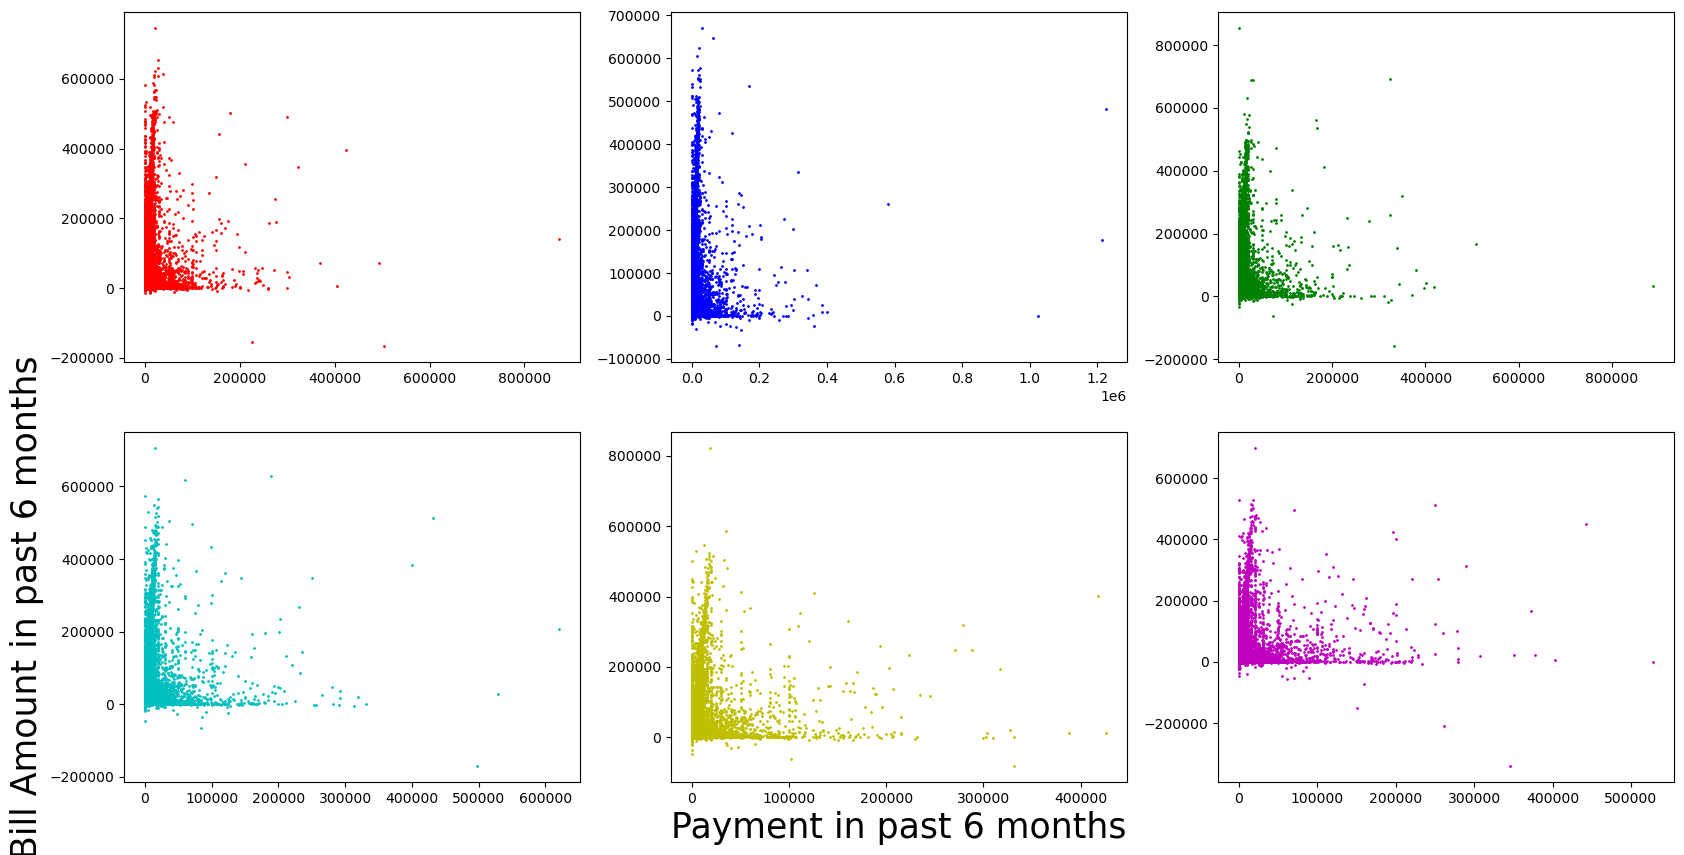

In [47]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=defaulters.PAY_AMT1, y=defaulters.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=defaulters.PAY_AMT2, y=defaulters.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=defaulters.PAY_AMT3, y=defaulters.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=defaulters.PAY_AMT4, y=defaulters.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=defaulters.PAY_AMT5, y=defaulters.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=defaulters.PAY_AMT6, y=defaulters.BILL_AMT6, c='m', s=1)

plt.show()